## Preparation of training and testing set

In [2]:
import numpy as np # import numpy library
import csv
import pandas as pd
import PIL
from PIL import Image # Import Image from PIL - a convenient package for dealing with images!
import requests 
import matplotlib.pyplot as plt # and this is for visualization
import seaborn as sns # visualization library, similar to matplotlib (based on matplotlib, actually)
from mpl_toolkits.axes_grid1 import ImageGrid
import os, shutil
import tensorflow as tf # import Tensorflow library
tf.random.set_seed(123)

### Separating images from the 'images' folder into new 'train' and 'test' based on the images names:

In [ ]:
original_dataset_dir = 'C:/Users/48507/Downloads/plant-pathology-2020-fgvc7/images' # The path of the directory into which the original dataset was unpacked.


train_dir = 'C:/Users/48507/Downloads/plant-pathology-2020-fgvc7/train' # A directory where larger data sets will be placed
test_dir = 'C:/Users/48507/Downloads/plant-pathology-2020-fgvc7/test' # A directory where smaller data sets will be placed
os.mkdir(train_dir)
os.mkdir(test_dir)


fnames = ['Train_{}.jpg'.format(i) for i in range(1821)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(train_dir, fname)
 shutil.copyfile(src, dst)


fnamesT = ['Test_{}.jpg'.format(i) for i in range(1821)]
for fnameT in fnamesT:
 src = os.path.join(original_dataset_dir, fnameT)
 dst = os.path.join(test_dir, fnameT)
 shutil.copyfile(src, dst)

### Loading train.csv and test.csv

In [ ]:
train_y = pd.read_csv("C:/Users/48507/Downloads/plant-pathology-2020-fgvc7/train.csv")
test_y = pd.read_csv("C:/Users/48507/Downloads/plant-pathology-2020-fgvc7/test.csv")

In [19]:
print(train_y.shape)
print(test_y.shape)

(1821, 5)
(1821, 1)


In [18]:
print(pd.DataFrame(test_y))

       image_id
0        Test_0
1        Test_1
2        Test_2
3        Test_3
4        Test_4
...         ...
1816  Test_1816
1817  Test_1817
1818  Test_1818
1819  Test_1819
1820  Test_1820

[1821 rows x 1 columns]


#### As we can see, images named Test.jpg do not contain any class information, so they cannot be used to test trained networks. Due to this, decided to divide the training photos (Train.jpg) into training and test photos.

In [ ]:
# Creating a dataframe with 80% values of original dataframe = train images
ds_train = train_y.sample(frac = 0.80)

# Creating dataframe with rest of the 20% values = test images
ds_test = train_y.drop(ds_train.index)

### Saving the split file to new csv

In [ ]:
ds_train.to_csv('C:/Users/48507/Downloads/plant-pathology-2020-fgvc7/ds_train.csv',index=False)
ds_test.to_csv('C:/Users/48507/Downloads/plant-pathology-2020-fgvc7/ds_test.csv',index=False)

In [14]:
print(ds_train.head(20))

      image_id  healthy  multiple_diseases  rust  scab
0     Train_50        0                  0     1     0
1   Train_1223        1                  0     0     0
2   Train_1431        0                  0     0     1
3    Train_203        0                  0     0     1
4   Train_1510        0                  0     1     0
5   Train_1567        0                  0     1     0
6   Train_1194        0                  0     1     0
7   Train_1660        0                  0     0     1
8    Train_590        0                  0     1     0
9   Train_1747        0                  0     0     1
10  Train_1210        1                  0     0     0
11   Train_441        0                  0     1     0
12   Train_965        0                  0     1     0
13   Train_550        1                  0     0     0
14  Train_1137        0                  0     0     1
15  Train_1620        0                  0     0     1
16   Train_922        0                  0     0     1
17  Train_

In [15]:
print(ds_test.head(20))

    image_id  healthy  multiple_diseases  rust  scab
0    Train_2        1                  0     0     0
1    Train_3        0                  0     1     0
2    Train_7        0                  0     0     1
3   Train_22        0                  0     0     1
4   Train_27        0                  0     0     1
5   Train_36        0                  1     0     0
6   Train_38        0                  0     1     0
7   Train_45        0                  0     1     0
8   Train_49        0                  0     0     1
9   Train_53        1                  0     0     0
10  Train_54        1                  0     0     0
11  Train_58        0                  0     1     0
12  Train_69        0                  0     1     0
13  Train_71        0                  0     1     0
14  Train_76        0                  0     0     1
15  Train_85        0                  0     0     1
16  Train_93        0                  0     1     0
17  Train_94        1                  0     0

In [9]:
print('Train set:')
for img_class in ds_train:
    print(f'Class {img_class} occurs in {ds_train[img_class].value_counts()[1]} images')

Train set:
Class image_id occurs in 1 images
Class healthy occurs in 402 images
Class multiple_diseases occurs in 76 images
Class rust occurs in 497 images
Class scab occurs in 482 images


In [10]:
print('Test set:')
for img_class in ds_test:
    print(f'Class {img_class} occurs in {ds_test[img_class].value_counts()[1]} images')

Test set:
Class image_id occurs in 1 images
Class healthy occurs in 114 images
Class multiple_diseases occurs in 15 images
Class rust occurs in 125 images
Class scab occurs in 110 images


Based on the above information, it can be said that the collection is divided into 4 classes:
- healthy
- rust
- scab
- multiple diseases

Each photo contains an individual number and is assigned to only one class. In total, we have **1457** images in the training set and **364** images in the test set.

In [11]:
df_train= ds_train.copy()
df_train['classes']= df_train.apply(lambda row: list(row[row == 1].index), axis=1)
df_train= df_train[['image_id', 'classes']]

df_test= ds_test.copy()
df_test['classes']= df_test.apply(lambda row: list(row[row == 1].index), axis=1)
df_test= df_test[['image_id', 'classes']]

### Histogram for train set

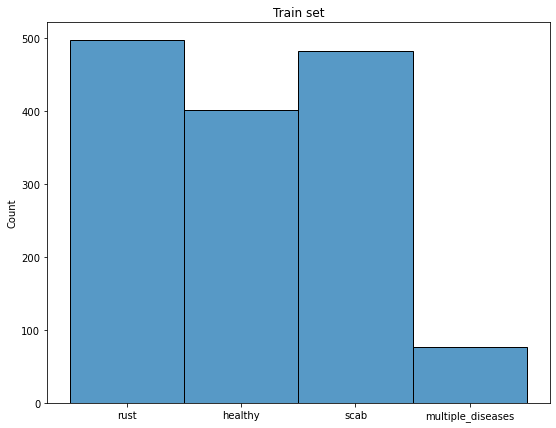

In [12]:
clas=df_train["classes"]
fl=[]
for item in clas:
    fl += item

plt.figure(figsize=(9,7));
hist = sns.histplot(fl).set(title="Train set")

plt.show()

### Histogram for test set

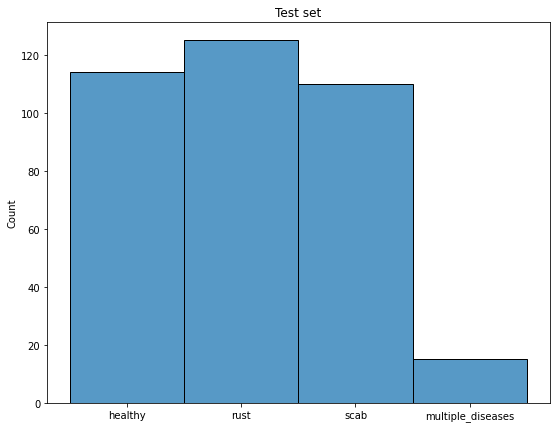

In [13]:
clas_t=df_test["classes"]
fl_t=[]
for item in clas_t:
    fl_t += item

plt.figure(figsize=(9,7));
hist = sns.histplot(fl_t).set(title="Test set")

plt.show()

#### Based on the obtained graphs, it can be observed that the dataset is strongly unbalanced in terms of the "multiple diseases" class. The number of photos of plants belonging to the other classes is more or less very similar

### Assigning training and test photos to folders according to their classes:

##### Decided to use imageDataGenerator for augmentation and preparation of sets for training. For this purpose, it was necessary to assign photos to folders with given class names

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

train_dataset_dir = r'C:/Users/48507/Downloads/plant-pathology-2020-fgvc7/train'
train_path= r'C:/Users/48507/Downloads/plant-pathology-2020-fgvc7/train_classes'
test_path= r'C:/Users/48507/Downloads/plant-pathology-2020-fgvc7/test_classes'

def move_images(csv, image_path, final_path):
    errors= []
    for img in csv['image_id']:
        image= Image.open(os.path.join(image_path, f'{img}.jpg'))
        img_class= csv[csv['image_id']== img]['classes'].values[0][0]

        if os.path.isdir(os.path.join(final_path, img_class)):
            image.save(os.path.join(final_path, img_class, f'{img}.jpg'))
        else:
            os.mkdir(os.path.join(final_path, img_class))
            image.save(os.path.join(final_path, img_class, f'{img}.jpg'))

In [ ]:
move_images(df_test, train_dataset_dir, test_path)
move_images(df_train, train_dataset_dir, train_path)